# Entwicklung der Kindersterblichkeitsrate 
Gruppe: Ajna Aliji & Melisa Dedukic


Fragen:
1. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
2. Welche Länder haben derzeit die höchste bzw. niedrigste Kindersterblichkeitsrate?
3. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern? 
4. Bei welchen Ländern, stagniert bzw. Steigt die Kindersterblichkeitrate?
5. Welche Regionen zeigen den grössten Rückgang in der Kindersterblichkeits?
6. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen städtischen und ländlichen Rgionen?  

Quellen:
- https://childmortality.org/all-cause-mortality/data
- https://www.gapminder.org/data/documentation/gd005/  
- https://ourworldindata.org/population-sources 






## 1. Daten beschaffen und laden

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
# loading the data
df = pd.read_csv('child-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Unter 5 Sterblichkeitsrate']) 
df.head()

,Gebiet,Code,Jahr,Unter 5 Sterblichkeitsrate
0,Afghanistan,AFG,2014,7.528273
1,Afghanistan,AFG,2015,7.267698
2,Afghanistan,AFG,2016,7.023421
3,Afghanistan,AFG,2017,6.791161
4,Afghanistan,AFG,2018,6.575211


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?
# 2. Daten vorbereiten-> bearbeiten!!!!!


In [8]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Under-five mortality rate')
df_pivot.head()

Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.796442,7.577729,7.376779,7.170871,6.982090,6.792204,6.606280,6.420107,6.232287,6.053605
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [9]:
df.dtypes

Entity                        object
Code                          object
Year                           int64
Under-five mortality rate    float64
dtype: object

### 3.1 Analyse Gebiete

In [10]:
print('Anzahl verschiedener Entity: ', len(df['Entity'].unique()))

Anzahl verschiedener Entity:  233


In [11]:
# Anzahl Datenpunkte pro Gebiet
df['Entity'].value_counts()

Entity
Sweden                                       272
Austria                                      213
France                                       207
Belgium                                      189
Denmark                                      188
                                            ... 
Lower-middle-income countries                 33
South-Eastern Asia (SDG)                      33
Southern Asia (SDG)                           33
Sub-Saharan Africa (SDG)                      33
Eastern Asia and South-Eastern Asia (SDG)     33
Name: count, Length: 233, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

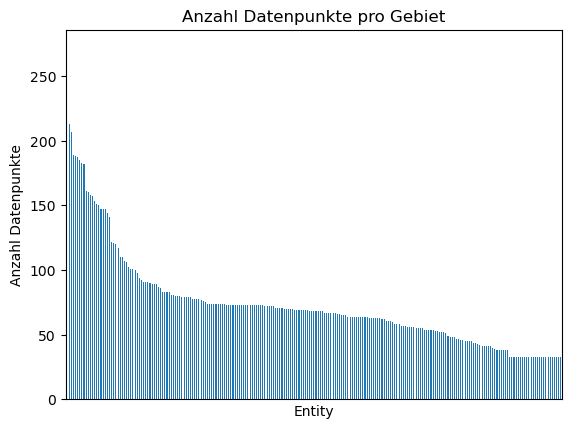

In [12]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [13]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  203


In [14]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
SWE         272
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
AIA          38
SMR          38
AND          38
MCO          38
OWID_WRL     33
Name: count, Length: 202, dtype: int64

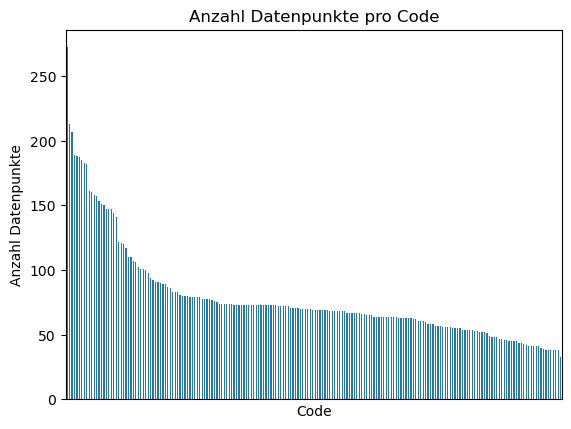

In [15]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [16]:
print('Anzahl verschiedener Year: ', len(df['Year'].unique()))

Anzahl verschiedener Year:  272


In [17]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64

In [18]:
total_countries = len(df['Entity'].unique())

years_with_all_countries = df['Year'].value_counts()
years_with_all_countries = years_with_all_countries[years_with_all_countries == total_countries]
print("Jahre, in denen alle Länder erfasst wurden:")
print(years_with_all_countries)

Jahre, in denen alle Länder erfasst wurden:
Year
2003    233
2002    233
1992    233
1993    233
1994    233
1995    233
1996    233
1997    233
1998    233
1999    233
2000    233
2001    233
1991    233
1990    233
2004    233
2005    233
2006    233
2007    233
2008    233
2009    233
2010    233
Name: count, dtype: int64


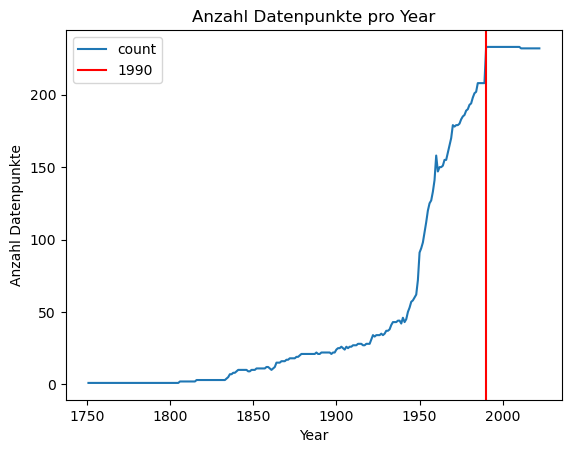

In [19]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Year');
g.axvline(x=1990, color='red',label='1990') # rote Linie bei 1990 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Lebenserwartung

In [20]:
df.describe()

,Year,Under-five mortality rate
count,17183.000000,17183.000000
mean,1975.538963,10.386308
std,40.212128,10.398669
min,1751.000000,0.146058
25%,1961.000000,2.173641
50%,1985.000000,6.395330
75%,2004.000000,16.118613
max,2022.000000,68.208000


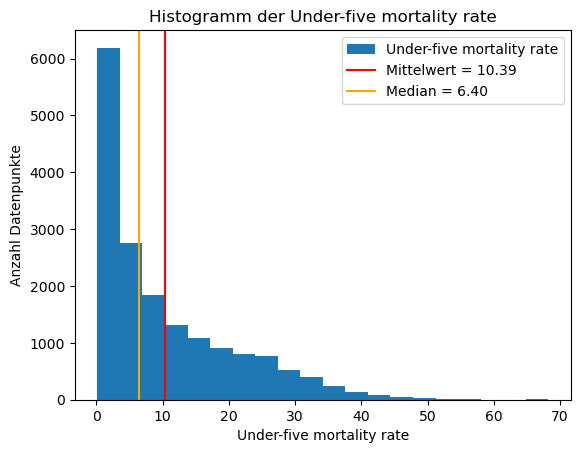

In [21]:
g = df['Under-five mortality rate'].plot(kind='hist', bins=20, title='Histogramm der Under-five mortality rate', 
                           xlabel='Under-five mortality rate', ylabel='Anzahl Datenpunkte')
mean = df['Under-five mortality rate'].mean()
g.axvline(x=df['Under-five mortality rate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Under-five mortality rate'].median()
g.axvline(x=df['Under-five mortality rate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Vorgehen

### Beobachtungen

### Interpretation
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Berechnungen

In [22]:
diffs = df_pivot[2022]-df_pivot[2012]   # Differenz zwischen 2022 und 2012
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Entity
Sierra Leone   -4.675695
Somalia        -4.010715
Angola         -3.737656
Chad           -3.686804
Burkina Faso   -3.314599
                  ...   
Palau           0.265259
Lebanon         0.502895
Venezuela       0.676667
Fiji            0.701049
Dominica        0.754504
Length: 232, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Lebenserwartung 2011-2021'}, ylabel='Entity'>

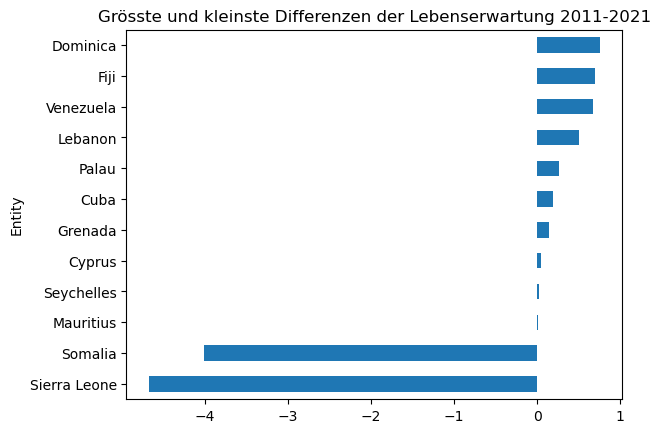

In [41]:
diff_sel = (diffs < -4) | (diffs > 0)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2021')

In [24]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Sierra Leone', 'Somalia', 'Mauritius', 'Seychelles', 'Cyprus', 'Grenada', 'Cuba', 'Palau', 'Lebanon', 'Venezuela', 'Fiji', 'Dominica']


### Visualisierung

Text(2006.5, 35, 'Hungerkriese')

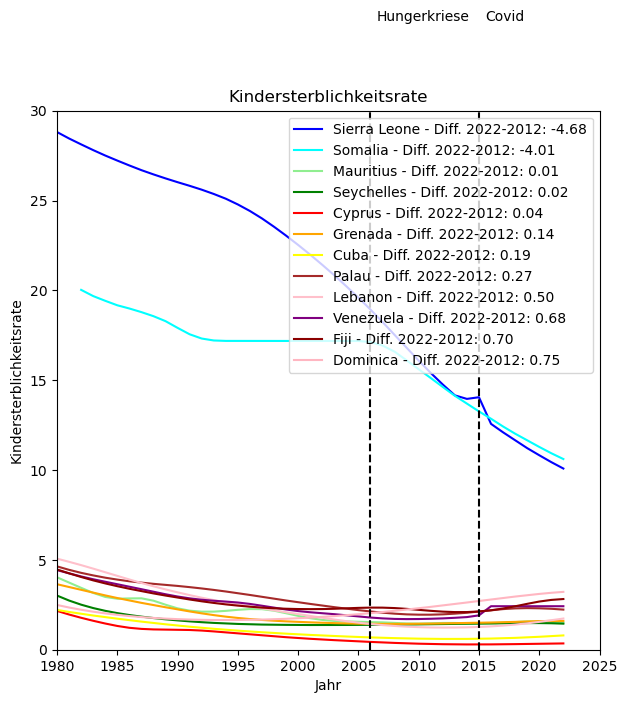

In [45]:
color_dict = {
    'Sierra Leone': 'blue',
    'Somalia': 'cyan',
    'Mauritius': 'lightgreen',
    'Seychelles': 'green',
    'Cyprus': 'red',
    'Grenada': 'orange',
    'Cuba': 'yellow',
    'Palau': 'brown',
    'Lebanon': 'pink',
    'Venezuela': 'purple',
    'Fiji': 'darkred',
    'Dominica': 'lightpink'
    
}

for entity in Gebiets_liste:
    diff = diffs[entity]
    g = df_pivot.loc[entity].plot(title="Kindersterblichkeitsrate", xlabel="Jahr", ylabel=f"Kindersterblichkeitsrate", legend=True,
                                  label=f"{entity} - Diff. 2022-2012: {diff:.2f}", # für die Legende
                                  xlim=[1980,2025], ylim=[0,30],   # x- und y-Achsen begrenzen
                                  color=color_dict[entity],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2015, color='black', linestyle='--') 
g.text(2015.5, 35, 'Covid')  

# globale Massnahmen gegen Hungerkriesen
g.axvline(x=2006, color='black', linestyle='--')  
g.text(2006.5, 35, 'Hungerkriese')

### Berechnung der weltweiten Kindersterblichkeitsrate


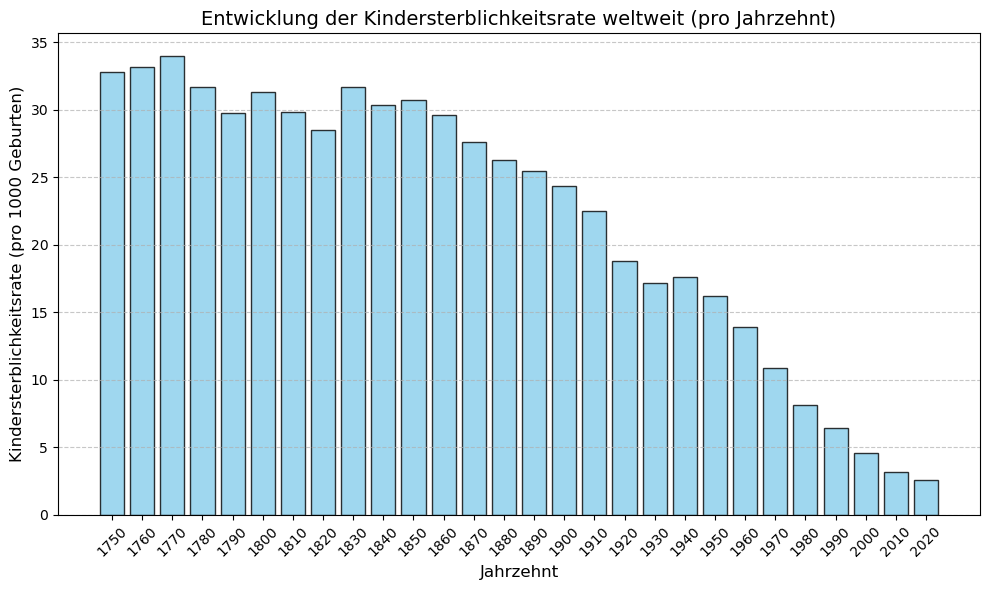

In [26]:
# Sicherstellen, dass die Spalte "Year" numerisch ist
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])  # Entferne Zeilen mit fehlenden Werten in der "Year"-Spalte

# Sicherstellen, dass die Spalte "Under-five mortality rate" numerisch ist
df['Under-five mortality rate'] = pd.to_numeric(df['Under-five mortality rate'], errors='coerce')
df = df.dropna(subset=['Under-five mortality rate'])  # Entferne Zeilen mit fehlenden Werten

# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Year'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Under-five mortality rate'].mean()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(decade_avg.index, decade_avg.values, width=8, color='skyblue', edgecolor='black', alpha=0.8)

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

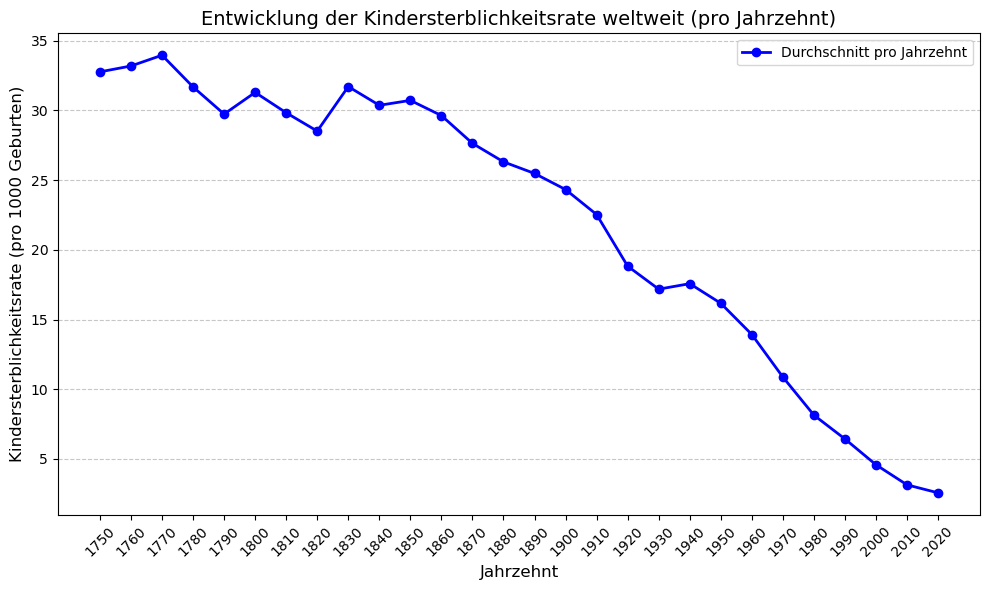

In [27]:
# Sicherstellen, dass die Spalte "Year" numerisch ist
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])  # Entferne Zeilen mit fehlenden Werten in der "Year"-Spalte

# Sicherstellen, dass die Spalte "Under-five mortality rate" numerisch ist
df['Under-five mortality rate'] = pd.to_numeric(df['Under-five mortality rate'], errors='coerce')
df = df.dropna(subset=['Under-five mortality rate'])  # Entferne Zeilen mit fehlenden Werten

# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Year'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Under-five mortality rate'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(decade_avg.index, decade_avg.values, marker='o', color='blue', linestyle='-', linewidth=2, label='Durchschnitt pro Jahrzehnt')

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### Welche Länder haben die niedrigste/ höste Kindersterblichkeitsrate


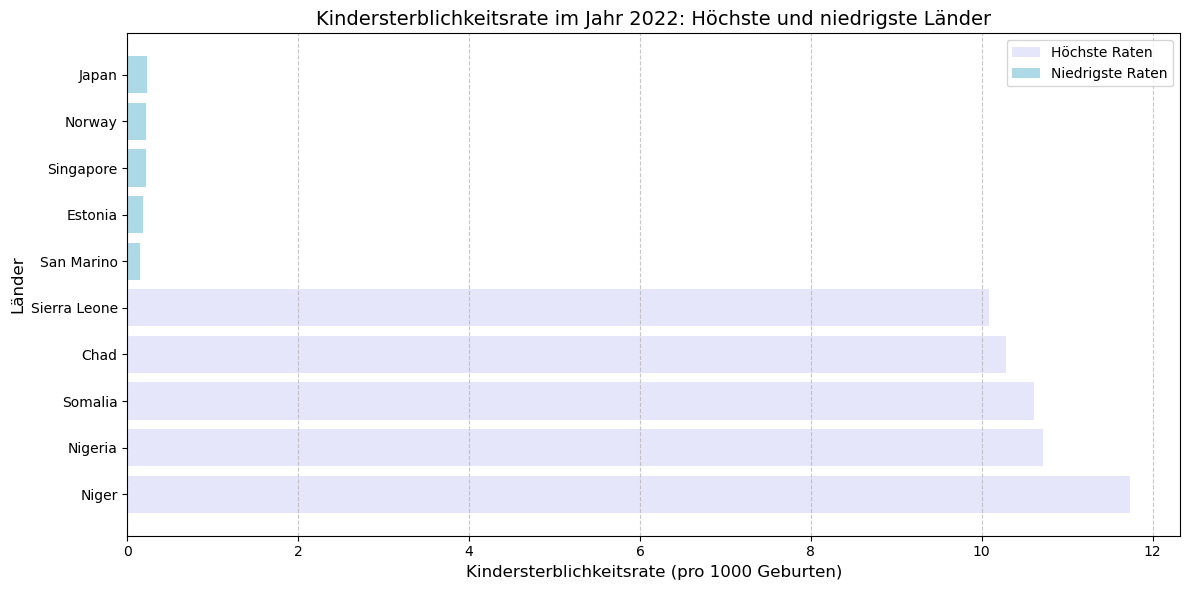

Länder mit der höchsten Kindersterblichkeitsrate im Jahr 2022:
             Entity  Under-five mortality rate
10950         Niger                  11.734437
11008       Nigeria                  10.717279
13985       Somalia                  10.613298
2981           Chad                  10.285629
13596  Sierra Leone                  10.084661

Länder mit der niedrigsten Kindersterblichkeitsrate im Jahr 2022:
           Entity  Under-five mortality rate
13225  San Marino                   0.146058
4774      Estonia                   0.188061
13685   Singapore                   0.215215
11551      Norway                   0.216749
7923        Japan                   0.227614


In [28]:
# Sicherstellen, dass die Spalte "Under-five mortality rate" numerisch ist
df['Under-five mortality rate'] = pd.to_numeric(df['Under-five mortality rate'], errors='coerce')
df = df.dropna(subset=['Under-five mortality rate'])  # Entferne Zeilen mit fehlenden Werten

# Sicherstellen, dass die Spalte "Year" numerisch ist
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])  # Entferne Zeilen mit fehlenden Werten

# Daten des neuesten Jahres extrahieren
latest_year = int(df['Year'].max())
latest_data = df[df['Year'] == latest_year]

# Länder mit der höchsten und niedrigsten Kindersterblichkeitsrate
highest_mortality = latest_data.nlargest(5, 'Under-five mortality rate')  # Top 5 mit höchster Rate
lowest_mortality = latest_data.nsmallest(5, 'Under-five mortality rate')  # Top 5 mit niedrigster Rate

# Daten für die Visualisierung vorbereiten
highest_data = highest_mortality[['Entity', 'Under-five mortality rate']]
lowest_data = lowest_mortality[['Entity', 'Under-five mortality rate']]

# Visualisierung: Balkendiagramm
plt.figure(figsize=(12, 6))

# Balken für höchste Kindersterblichkeitsraten
plt.barh(highest_data['Entity'], highest_data['Under-five mortality rate'], color='lavender', label='Höchste Raten')

# Balken für niedrigste Kindersterblichkeitsraten
plt.barh(lowest_data['Entity'], lowest_data['Under-five mortality rate'], color='lightblue', label='Niedrigste Raten')

# Diagramm anpassen
plt.title(f'Kindersterblichkeitsrate im Jahr {latest_year}: Höchste und niedrigste Länder', fontsize=14)
plt.xlabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.ylabel('Länder', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Länder mit der höchsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(highest_mortality[['Entity', 'Under-five mortality rate']])

print(f"\nLänder mit der niedrigsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(lowest_mortality[['Entity', 'Under-five mortality rate']])


### Bei welchen Ländern, stagniert bzw. Steigt die Kindersterblichkeitrate?

In [29]:


# Daten laden
df = pd.read_csv('child-mortality.csv')  # Ersetze durch den tatsächlichen Dateinamen

# Sicherstellen, dass die Spalten "Under-five mortality rate" und "Year" numerisch sind
df['Under-five mortality rate'] = pd.to_numeric(df['Under-five mortality rate'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Under-five mortality rate', 'Year'])  # Entferne Zeilen mit fehlenden Werten

# Daten nach Ländern gruppieren und die jährlichen Veränderungen berechnen
df_sorted = df.sort_values(by=['Entity', 'Year'])  # Daten nach Land und Jahr sortieren
df['Change'] = df.groupby('Entity')['Under-five mortality rate'].diff()  # Differenz zur vorherigen Jahr

# Filtern: Jahre mit steigender Kindersterblichkeitsrate
increasing_rates = df[df['Change'] > 0]

# Ab welchem Jahr hat die Kindersterblichkeitsrate in jedem Land zugenommen?
first_increase = increasing_rates.groupby('Entity').first().reset_index()

# Ergebnisse anzeigen
print("Ab welchem Jahr hat die Kindersterblichkeitsrate zugenommen:")
print(first_increase[['Entity', 'Year', 'Under-five mortality rate']])

# Optional: Export der Ergebnisse in eine CSV-Datei
first_increase.to_csv('countries_first_increase.csv', index=False)


Ab welchem Jahr hat die Kindersterblichkeitsrate zugenommen:
                 Entity  Year  Under-five mortality rate
0           Afghanistan  1957                  37.245758
1                Africa  1944                  34.128970
2               Albania  2018                   0.934290
3               Algeria  1954                  24.275417
4               Andorra  1990                   1.288035
..                  ...   ...                        ...
208             Vietnam  1964                   8.761518
209  Western Asia (SDG)  2012                   2.722078
210               Yemen  2015                   4.932762
211              Zambia  2018                   6.395330
212            Zimbabwe  1954                  17.063305

[213 rows x 3 columns]
